# Modeling and A/B Testing with Ride Share Data
In this project I built and tested different models one ride share data to preduct customer churn. 



### Importing Data 
- Imported Cleaned data set Kaggle, see reference below
- Used MinMaxScaler to normalize data
- Saved new CSV file and printed first 5 lines of new data frame 

In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned data file from project 1 
file_path = '/Users/mariagarcia/Desktop/DAT301/waze_data_cleaned.csv'
waze_data = pd.read_csv(file_path)

#droped ID and device columns 
waze_data = waze_data.drop(columns=['ID', 'device'])

# Selected specific columns to normalize 
columns_to_normalize = [
    'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
    'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
    'duration_minutes_drives', 'activity_days', 'driving_days'
]

# Normalize data with MinMaxScaler
scaler = MinMaxScaler()
waze_data[columns_to_normalize] = scaler.fit_transform(waze_data[columns_to_normalize])

# Save the normalized data to a new CSV file
normalized_file_path = '/Users/mariagarcia/Desktop/DAT301/waze_data_normalized.csv'
waze_data.to_csv(normalized_file_path, index=False)


waze_data.head()


customer_status  sessions    drives  total_sessions  \
0        retained  0.380888  0.379195        0.243868   
1        retained  0.179004  0.179530        0.268663   
2        retained  0.153432  0.159396        0.111275   
3        retained  0.065949  0.067114        0.055405   
4        retained  0.113055  0.114094        0.138187   

   n_days_after_onboarding  total_navigations_fav1  total_navigations_fav2  \
0                 0.649886                0.168285                0.000000   
1                 0.349256                0.015372                0.154217   
2                 0.757151                0.000000                0.000000   
3                 0.003146                0.260518                0.016867   
4                 0.445652                0.134304                0.012048   

   driven_km_drives  duration_minutes_drives  activity_days  driving_days  
0          0.121593                 0.124262       0.903226      0.633333  
1          0.646476                 0.198453       0.419355      0.366667  
2          0.141964                 0.100575       0.451613      0.266667  
3          0.040390                 0.035931       0.225806      0.100000  
4          0.184148                 0.075869       0.870968      0.600000

### Quick Calculation 
What is the percentage of retained vs. churned customers
*(added after decision was made to remove outliers)*

In [68]:
# Calculate percentage of retained and churned customers before removing outliers
customer_counts_after = waze_data['customer_status'].value_counts(normalize=True) * 100
print("\nPercentage of retained vs. churned customers after removing outliers:")
print(customer_counts_after)


Percentage of retained vs. churned customers after removing outliers:
customer_status
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64


### Confirming data has been normalized 
Used prettytable library to check if the data had been normalized correctly. 

In [69]:
from prettytable import PrettyTable

waze_data_normalized = pd.read_csv(normalized_file_path)

#create min max and mean 
stats = waze_data_normalized.describe().loc[['min', 'max', 'mean']]
stats = stats.transpose()

#prettyTable to display for every column, included not normalized columns 
table = PrettyTable()
table.field_names = ["Column Name", "Min", "Max", "Average"]

for row in stats.itertuples():
    table.add_row([row.Index, row.min, row.max, row.mean])

print(table)


+-------------------------+-----+--------------------+---------------------+
|       Column Name       | Min |        Max         |       Average       |
+-------------------------+-----+--------------------+---------------------+
|         sessions        | 0.0 |        1.0         | 0.10851119764137519 |
|          drives         | 0.0 |        1.0         | 0.11284533906956458 |
|      total_sessions     | 0.0 |        1.0         | 0.15570510558701223 |
| n_days_after_onboarding | 0.0 |        1.0         |  0.4999492291390974 |
|  total_navigations_fav1 | 0.0 |        1.0         | 0.09850112857825391 |
|  total_navigations_fav2 | 0.0 |        1.0         | 0.07141758164906635 |
|     driven_km_drives    | 0.0 | 1.0000000000000002 | 0.18860804376252607 |
| duration_minutes_drives | 0.0 |        1.0         | 0.11658345373138426 |
|      activity_days      | 0.0 |        1.0         |  0.5014404345893803 |
|       driving_days      | 0.0 |        1.0         |  0.4060843415623469 |

### Creating Histograms 
- Created histrograms for all numeric column to visualize normalization
- I anticipated all histograms would have the shape of the first graph
- activity_days, driving_days and n_days_after_onboarding do not have the anticipated shape 



<Figure size 1200x800 with 0 Axes>

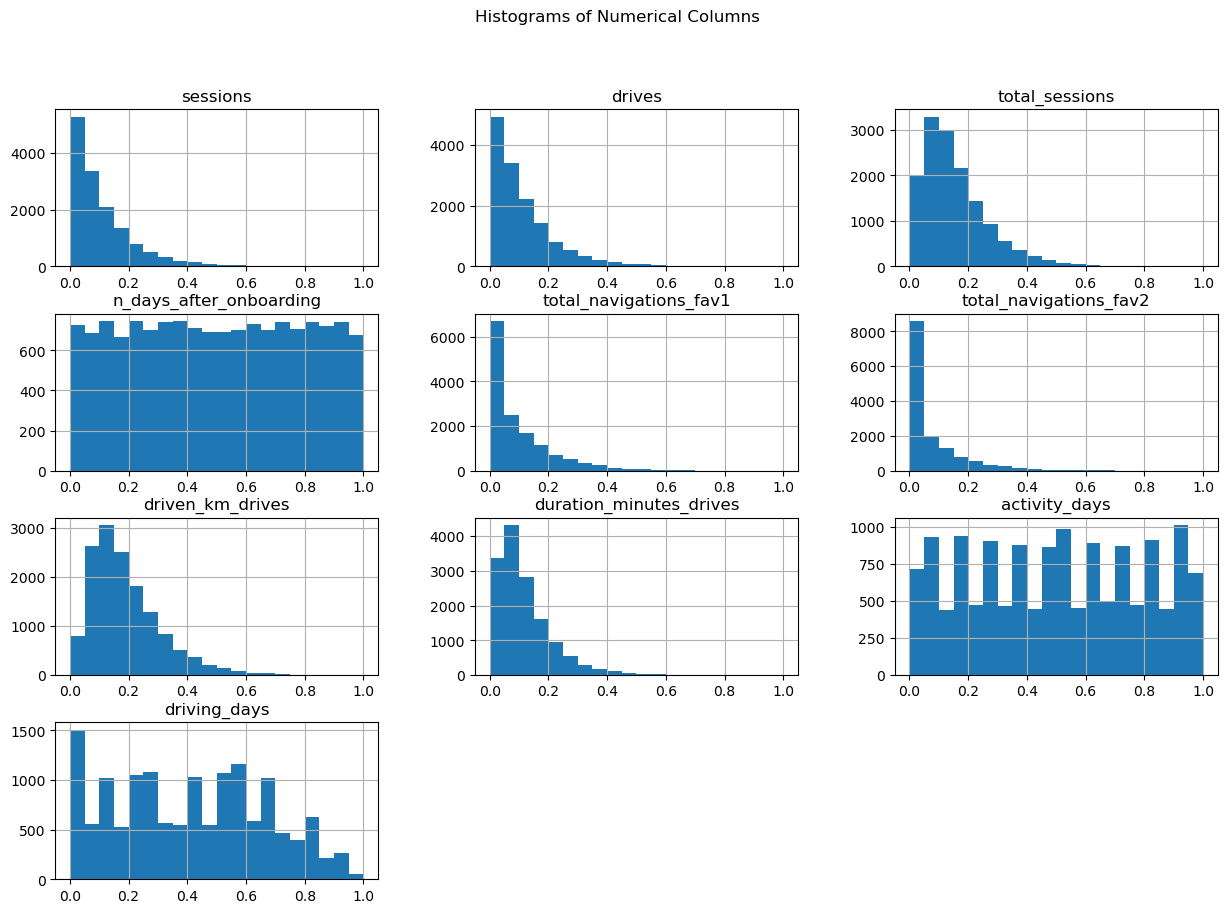

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Histograms for numeric columns
waze_data_normalized.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()



### Box Plots 
I used boxplots to see if there were still significant outliers

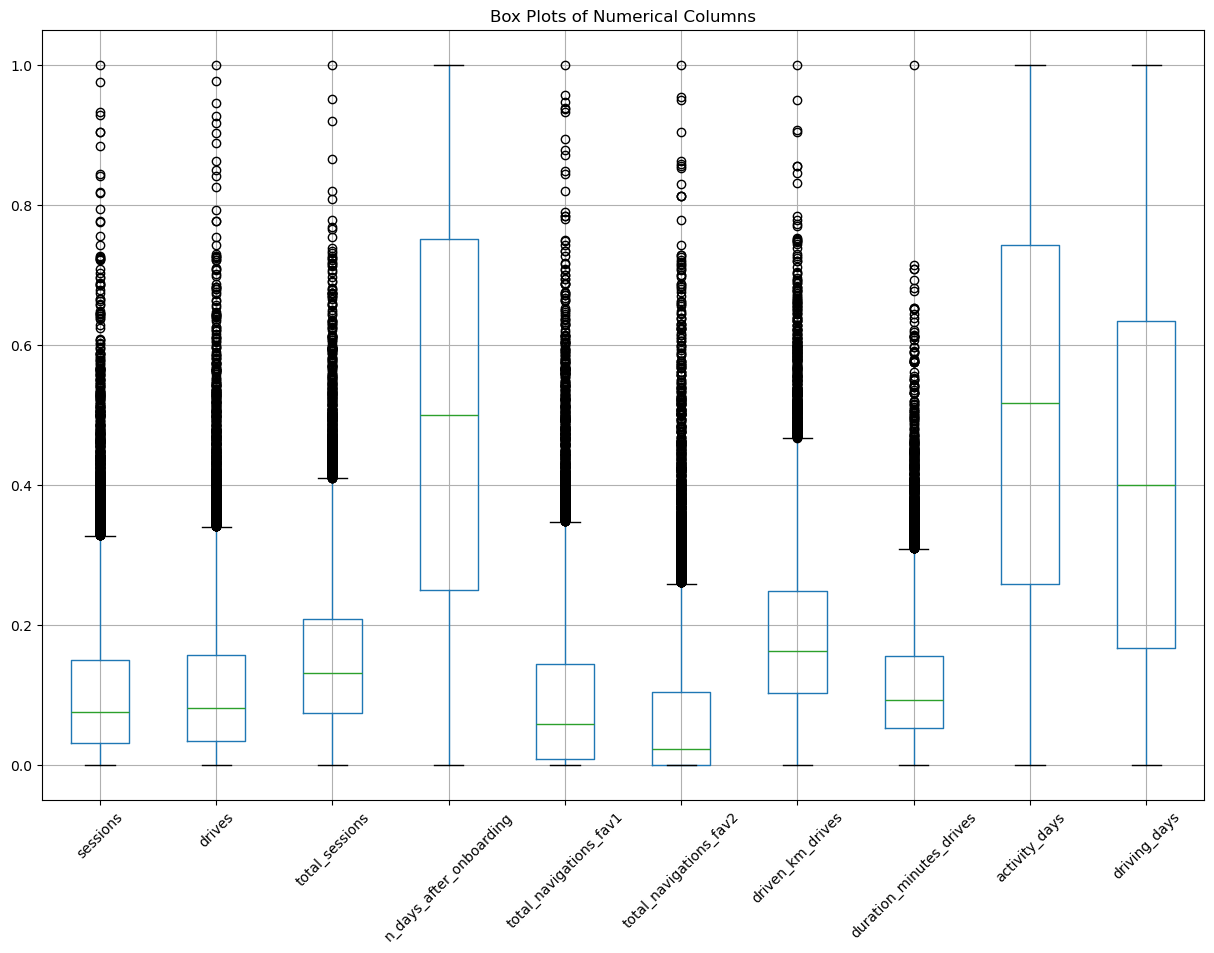

In [71]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
waze_data_normalized.boxplot()
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


### Taking Another Approach
- I decided instead to remove the outliers in the data
- Used the IQR method which took out outliers 1.5 above the third quartile or below the first quartile

In [72]:
import pandas as pd

# Load the cleaned CSV file
file_path = '/Users/mariagarcia/Desktop/DAT301/waze_data_cleaned.csv'
waze_data_cleaned = pd.read_csv(file_path)

# Remove the columns "ID" and "device"
waze_data_cleaned = waze_data_cleaned.drop(columns=['ID', 'device'])

# Function to remove outliers based on IQR
# This function was found online, please see refrences at bottom 
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Identify numeric columns
numeric_columns = waze_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from the numeric columns
waze_data_no_outliers = remove_outliers(waze_data_cleaned, numeric_columns)

# Save new CSV file 
cleaned_no_outliers_file_path = '/Users/mariagarcia/Desktop/DAT301/waze_data_no_outliers.csv'
waze_data_no_outliers.to_csv(cleaned_no_outliers_file_path, index=False)


waze_data_no_outliers.head()


customer_status  sessions  drives  total_sessions  n_days_after_onboarding  \
2        retained       114      95      135.522926                     2651   
3        retained        49      40       67.589221                       15   
4        retained        84      68      168.247020                     1562   
5        retained       113     103      279.544437                     2637   
6        retained         3       2      236.725314                      360   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   
5                       0                       0        901.238699   
6                     185                      18       5249.172828   

   duration_minutes_drives  activity_days  driving_days  
2              1610.735904             14             8  
3               587.196542              7             3  
4              1219.555924             27            18  
5               439.101397             15            11  
6               726.577205             28            23

### Ensuring Distro and Counts were not Significantly Impacted 
I wanted to ensure that I 
1. had enough data and
2. the percentage of retained vs. churned customers was roughly the same

Ideally there would be more churned customers in this data set, but removing the outliers gave a very slight percentage increase for that set

In [73]:
# Check the number of rows left
num_rows_left = waze_data_no_outliers.shape[0]
print(f"Number of rows left after removing outliers: {num_rows_left}")


# Calculate percentage of retained vs. churned customers after removing outliers
customer_counts_after = waze_data_no_outliers['customer_status'].value_counts(normalize=True) * 100
print("\nPercentage of retained vs. churned customers after removing outliers:")
print(customer_counts_after)

Number of rows left after removing outliers: 10712

Percentage of retained vs. churned customers after removing outliers:
customer_status
retained    83.205751
churned     16.794249
Name: proportion, dtype: float64


### Checking for Outliers Round 2 
I wanted to use boxplots again to check for significant outliers. As expected, the results were better. 

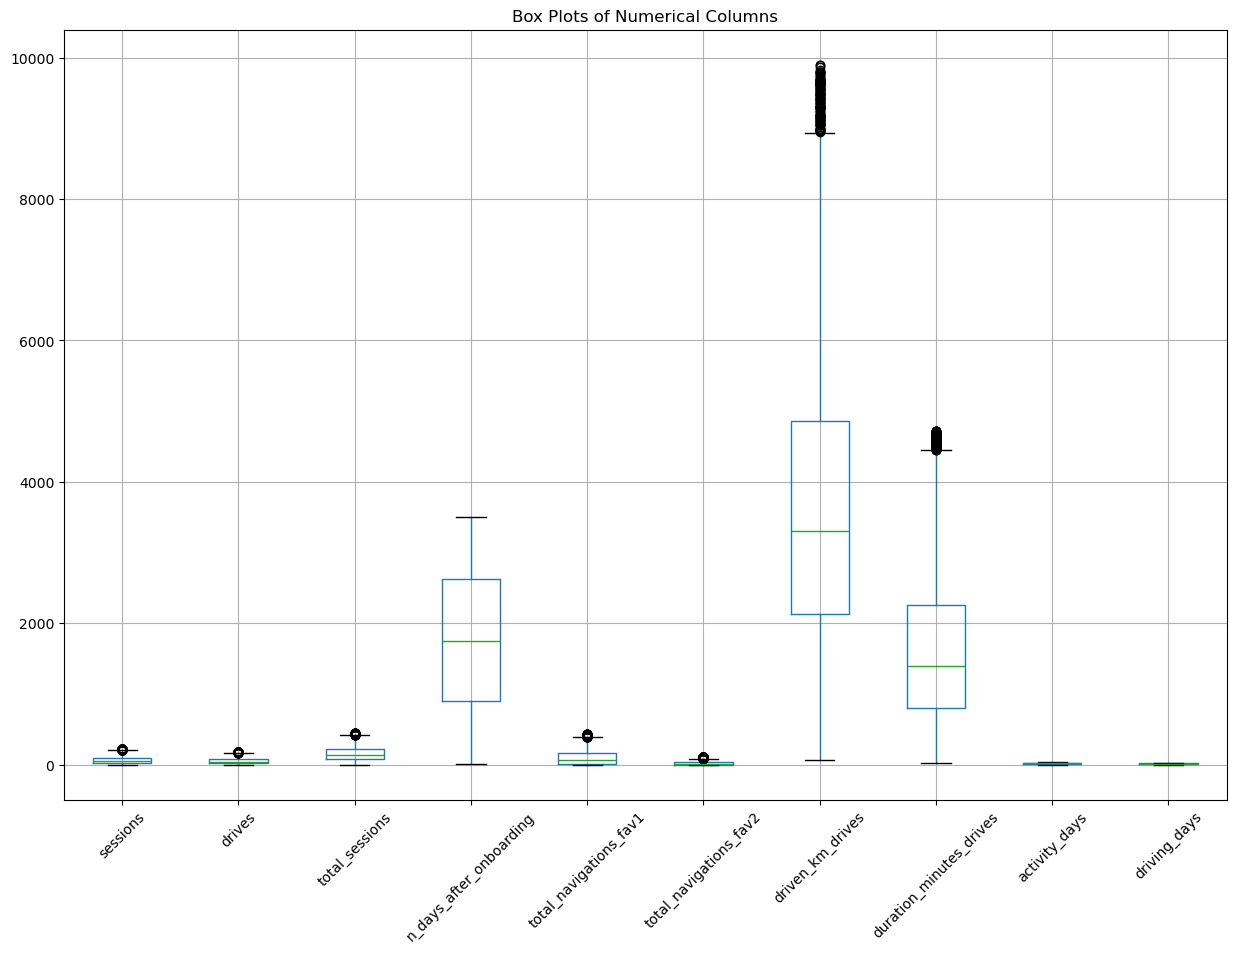

In [74]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
waze_data_no_outliers.boxplot()
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

### Not the Brightest, But Maybe The Most Colorful? 

I wanted to use pair plots to see if I could identify corelations with the outliers removed. It turned out that 
there were simply too many variables for this to be effective or easy to read. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

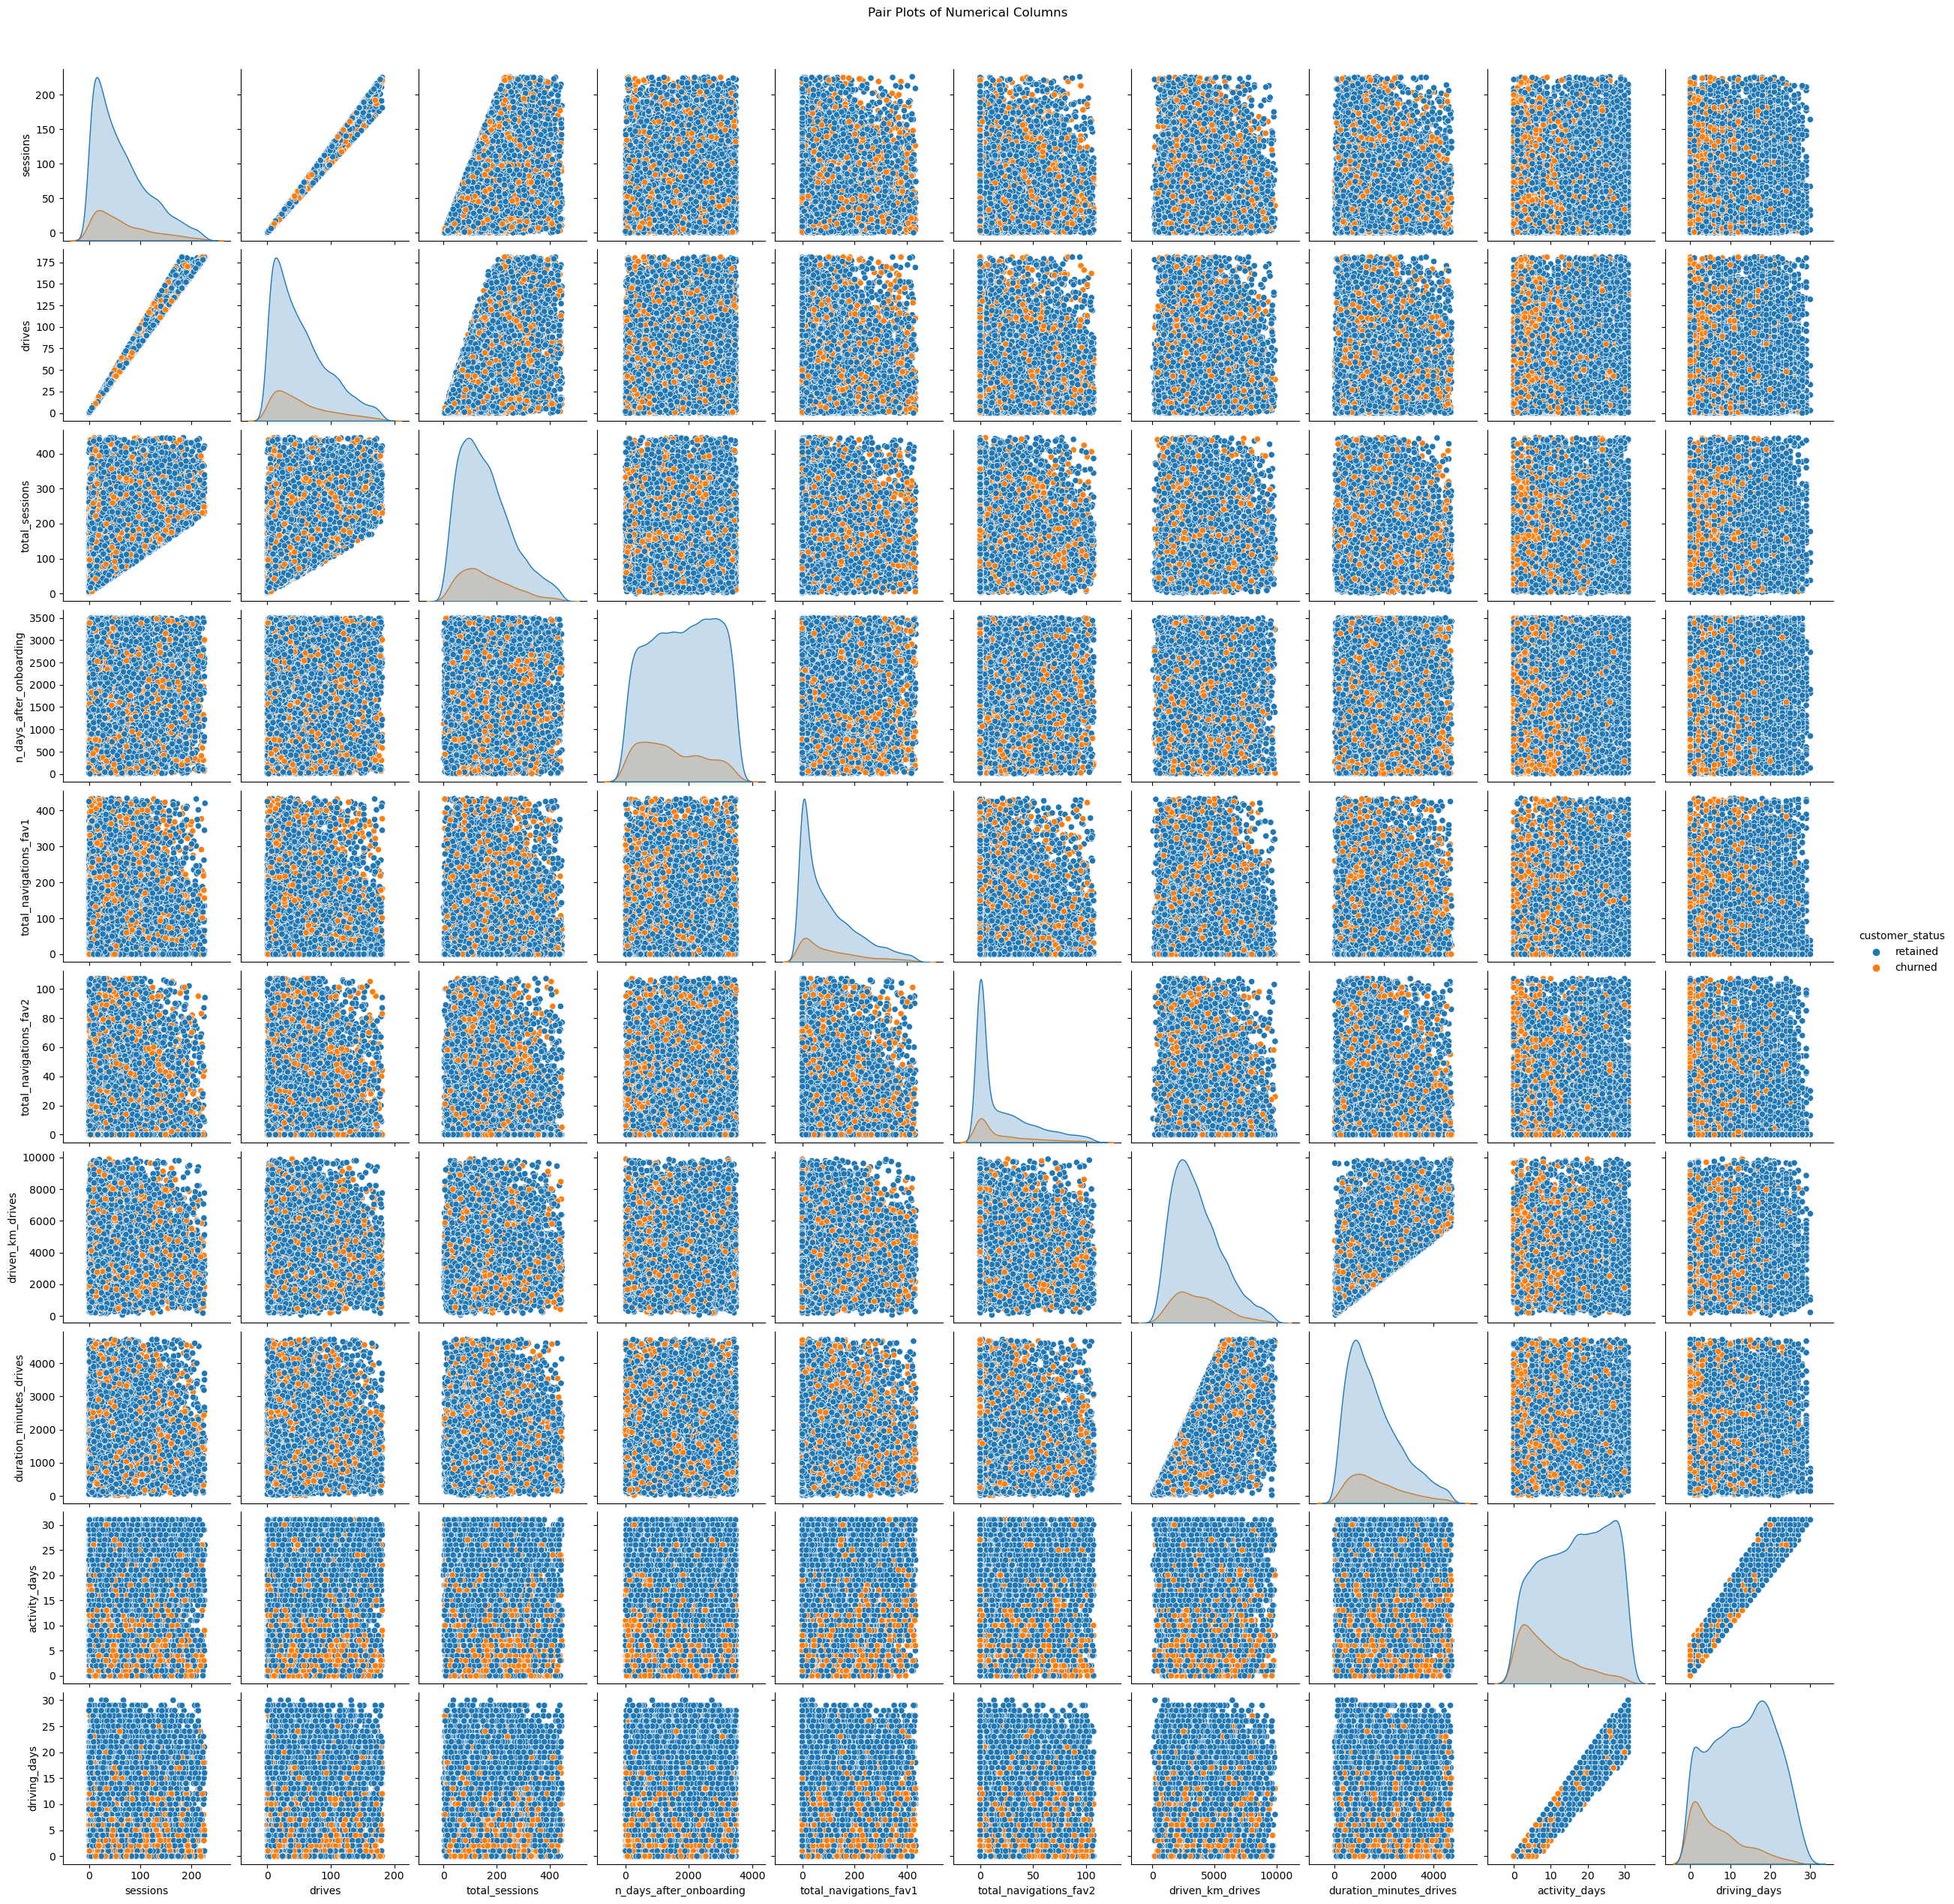

In [75]:
## pair plots 
sns.pairplot(waze_data_no_outliers, hue='customer_status')
plt.suptitle('Pair Plots of Numerical Columns', y=1.02)
plt.show()


### Correlation Heatmap 

I used a correlation heatmap to see if there could be correlations in data after outliers were removed. While there were more correlations identified that in Project 1, they were again variables that one would assume to be correlated. 

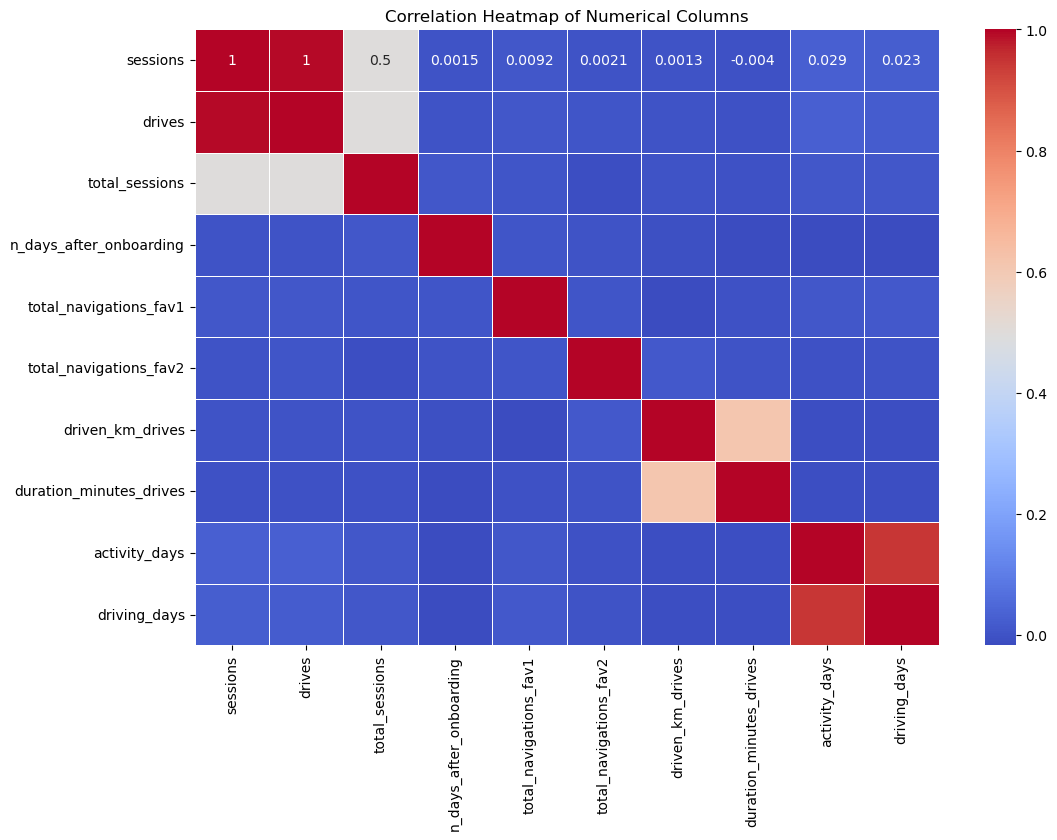

In [76]:
# Select only the numeric columns for the correlation heatmap
numeric_columns = waze_data_no_outliers.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### Building a Model 

Using sklearn library, I did the following : 
1. transformed the non-numerical variable customer_status to be numberical
2. Selected the target variable to be customer_status
3. Split the ~10k rows of data into training (80%) and testing (20%)
4. Normalized the data

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical variables
le_status = LabelEncoder()
waze_data_no_outliers['customer_status'] = le_status.fit_transform(waze_data_no_outliers['customer_status'])

# Define features and target variable
X = waze_data_no_outliers.drop(['customer_status'], axis=1)
y = waze_data_no_outliers['customer_status']

# Split the data into training (80%) and testing (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Building and Testing the Model 

Next, I trained the model and used it to make preductions 

- Although the overal model had 84% accuracy, it tended to predict a customer that would churn better than a customer that would not churn
 --- 

**Confusion Matrix** 
- 1770 True Positives (correctly predicted to churn) 
- 38 True Negatives (correctly predicted not to churn)
- 306 False Positives (incorrectly predicted to churn)
- 29 False Negatives (incorrectly predicted not to churn)


--- 

**Precision** 
- Model predicted churn correctly 85% of the time
- Model predicted retained correctly 57% of the time

---

**F1 Score** 
*Harmonic mean of precision and recall* 
- Poor performance on predicting non-churning customers
- High performance on predicting churning customers 


In [78]:
# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  38  306]
 [  29 1770]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.11      0.18       344
           1       0.85      0.98      0.91      1799

    accuracy                           0.84      2143
   macro avg       0.71      0.55      0.55      2143
weighted avg       0.81      0.84      0.80      2143


Accuracy Score: 0.8436770881941204


### Trying Random Forest Model 

In short, the results are not significantly different

**Confusion Matrix** 
- 1757 True Positives (correctly predicted to churn) 
- 26 True Negatives (correctly predicted not to churn)
- 318 False Positives (incorrectly predicted to churn)
- 42 False Negatives (incorrectly predicted not to churn)


--- 

**Precision** 
- Model predicted churn correctly 85% of the time
- Model predicted retained correctly 38% of the time

---

**F1 Score** 
*Harmonic mean of precision and recall* 
- Poor performance on predicting non-churning customers
- High performance on predicting churning customers 


---
**Overall 83% Accuracy**

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  26  318]
 [  42 1757]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.08      0.13       344
           1       0.85      0.98      0.91      1799

    accuracy                           0.83      2143
   macro avg       0.61      0.53      0.52      2143
weighted avg       0.77      0.83      0.78      2143


Accuracy Score: 0.8320111992533831


## Gradient Boosting Model 

In short, the results are not significantly different. 


**Confusion Matrix** 
- 1759 True Positives (correctly predicted to churn) 
- 21 True Negatives (correctly predicted not to churn)
- 323 False Positives (incorrectly predicted to churn)
- 40 False Negatives (incorrectly predicted not to churn)


--- 

**Precision** 
- Model predicted churn correctly 84% of the time
- Model predicted retained correctly 34% of the time

---

**F1 Score** 
*Harmonic mean of precision and recall* 
- Poor performance on predicting non-churning customers
- High performance on predicting churning customers

---
**Overall 83% Accuracy**

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  21  323]
 [  40 1759]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.06      0.10       344
           1       0.84      0.98      0.91      1799

    accuracy                           0.83      2143
   macro avg       0.59      0.52      0.51      2143
weighted avg       0.76      0.83      0.78      2143


Accuracy Score: 0.8306112925804946


### Refrences: 
- outlier function : https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
- models to try with sklearn: https://scikit-learn.org/stable/modules/sgd.html#classification
- Dataset: https://www.kaggle.com/datasets/juliasuzuki/waze-dataset-to-predict-user-churn